<a href="https://colab.research.google.com/github/aminrabinia/Instance-Segmentation-forestry-/blob/main/Logs_Segmentation_PixelLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instance Segmentation for Forest Images**

In this project we used [PixelLib](https://github.com/ayoolaolafenwa/PixelLib) to perform instance segmentation for detecting dead logs on the forest ground. These are the steps that we take:


1.   Data Preprocessing: preparing the data for the labeling process. 
2.   Uploading the labeled data (with LabelMe) and training the model.
3.   Testing the performance of the model on test data



# Data Preprocessing OpenCV

This function uses OpenCV to blend four images from the same location in a forest between 2014-18. After blending the images, we need to download the data and label them in [LabelMe](https://github.com/wkentaro/labelme). 
Different blending modes are also tested [here](https://colab.research.google.com/drive/1jZyLx_6fCe1v0NUGVkj08I-9Ei_n7Qox?usp=sharing).

In [ ]:
import cv2
#from google.colab.patches import cv2_imshow

def blend(path):

  file_name = ['2014', '2016', '2017','2018'] 
  last = len(file_name)

  alpha = 0.5 # the weight between two images
  beta = (1.0 - alpha)

  img1 = cv2.imread(path + file_name[0] + '.jpg')
  img2 = cv2.imread(path + file_name[2] + '.jpg')
  out1 = cv2.addWeighted(img1, alpha, img2, beta, 0)
  #cv2_imshow(out1)

  img3 = cv2.imread(path + file_name[1] + '.jpg')
  img4 = cv2.imread(path + file_name[3] + '.jpg')
  out2 = cv2.addWeighted(img3, alpha, img4, beta, 0)
  #cv2_imshow(out2)

  out = cv2.addWeighted(out1, alpha, out2, beta, 0)

  return out

# blend images from 44/39 to 47/58
for j in range(44,48):
  for i in range (39,59):
    path='/content/inputs/'+ str(j) + '-'+ str(i) +'_'
    blended_img = blend(path)
    cv2.imwrite('/content/outputs/'+ str(j) +'-' + str(i) + ".jpg", blended_img)


In [ ]:
!zip -r /content/outpus.zip /content/outputs

# Training PixelLib Model

After uplodaing the labeled dataset, we can train the model:  

1.   Unzip the dataset
2.   Download pixellib
3.   Download pretrained model weights mask_rcnn_coco.h5
4.   Train model with/out data augmentation
5.   Evaluate the trained models to find the best



In [ ]:
!unzip set5.zip
set_name = 'set5'

In [ ]:
!pip3 install pixellib

In [ ]:
!wget "https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5"

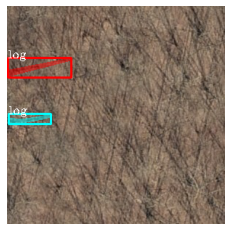

In [ ]:
### Visualize a sample image before training###

import pixellib
from pixellib.custom_train import instance_custom_training

vis_img = instance_custom_training()
vis_img.load_dataset(set_name)
vis_img.visualize_sample()

In [ ]:
###Training Code###

import pixellib
from pixellib.custom_train import instance_custom_training
import imgaug

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 1, batch_size = 2)
path = '/content/mask_rcnn_coco.h5'
train_maskrcnn.load_pretrained_model(path)
train_maskrcnn.load_dataset(set_name)

augmentation = imgaug.augmenters.Sometimes(0.9, [
			        imgaug.augmenters.Fliplr(0.5),
			        imgaug.augmenters.Flipud(0.5),
              imgaug.augmenters.Rot90([1,3]),
              imgaug.augmenters.Affine(rotate=[20,40,60,80]),
			        imgaug.augmenters.GaussianBlur(sigma=(0.0, 5.0))
			        ])

train_maskrcnn.train_model(num_epochs = 20, augmentation= augmentation, path_trained_models = "mask_rcnn_models")

Using resnet101 as network backbone For Mask R-CNN model
Applying Custom Augmentation on Dataset
Train 104 images
Validate 20 images
Checkpoint Path: /content/mask_rcnn_models
Selecting layers to train
Epoch 1/20
100/100 [==============================] - 301s 2s/step - batch: 49.5000 - size: 2.0000 - loss: 2.3180 - rpn_class_loss: 0.1948 - rpn_bbox_loss: 0.8208 - mrcnn_class_loss: 0.1664 - mrcnn_bbox_loss: 0.7154 - mrcnn_mask_loss: 0.4206 - val_loss: 1.7481 - val_rpn_class_loss: 0.0835 - val_rpn_bbox_loss: 0.6236 - val_mrcnn_class_loss: 0.1434 - val_mrcnn_bbox_loss: 0.5747 - val_mrcnn_mask_loss: 0.3229
Epoch 2/20
100/100 [==============================] - 198s 2s/step - batch: 49.5000 - size: 2.0000 - loss: 1.8963 - rpn_class_loss: 0.1581 - rpn_bbox_loss: 0.7083 - mrcnn_class_loss: 0.1255 - mrcnn_bbox_loss: 0.5499 - mrcnn_mask_loss: 0.3545 - val_loss: 1.6787 - val_rpn_class_loss: 0.0588 - val_rpn_bbox_loss: 0.7654 - val_mrcnn_class_loss: 0.1103 - val_mrcnn_bbox_loss: 0.4788 - val_mrcn

In [ ]:
###Evaluation Code

import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 1)
train_maskrcnn.load_dataset(set_name)
train_maskrcnn.evaluate_model("/content/mask_rcnn_models")

Using resnet101 as network backbone For Mask R-CNN model
/content/mask_rcnn_models/mask_rcnn_model.001-1.409969.h5 evaluation using iou_threshold 0.5 is 0.199167 

/content/mask_rcnn_models/mask_rcnn_model.001-1.575536.h5 evaluation using iou_threshold 0.5 is 0.161389 

/content/mask_rcnn_models/mask_rcnn_model.002-1.355819.h5 evaluation using iou_threshold 0.5 is 0.206429 

/content/mask_rcnn_models/mask_rcnn_model.003-1.286722.h5 evaluation using iou_threshold 0.5 is 0.335833 

/content/mask_rcnn_models/mask_rcnn_model.003-1.375949.h5 evaluation using iou_threshold 0.5 is 0.361185 

/content/mask_rcnn_models/mask_rcnn_model.004-1.244053.h5 evaluation using iou_threshold 0.5 is 0.237123 

/content/mask_rcnn_models/mask_rcnn_model.005-1.225593.h5 evaluation using iou_threshold 0.5 is 0.246944 

/content/mask_rcnn_models/mask_rcnn_model.006-1.151716.h5 evaluation using iou_threshold 0.5 is 0.393889 



# Test

For testing the model on unseen images we need to first blend the images (2014-18) and then run segmentImage() on the merged images. 

In [ ]:
import cv2

def blend(path):

  file_name = ['2014', '2016', '2017','2018'] 
  last = len(file_name)

  alpha = 0.5
  beta = (1.0 - alpha)

  img1 = cv2.imread(path + file_name[0] + '.jpg')
  img2 = cv2.imread(path + file_name[2] + '.jpg')
  out1 = cv2.addWeighted(img1, alpha, img2, beta, 0)

  img3 = cv2.imread(path + file_name[1] + '.jpg')
  img4 = cv2.imread(path + file_name[3] + '.jpg')
  out2 = cv2.addWeighted(img3, alpha, img4, beta, 0)

  out = cv2.addWeighted(out1, alpha, out2, beta, 0)

  return out

# blend imgs from 56-39 to 57-58
for j in range(56,58):
  for i in range (39,59):
    path='/content/test/'+ str(j) + '-'+ str(i) +'_'
    blended_img = blend(path)
    cv2.imwrite('/content/test/'+ str(j) +'-' + str(i) + ".jpg", blended_img)

In [ ]:
!pip3 install pixellib

/content/test/56-39
Processed image saved successfully in your current working directory.


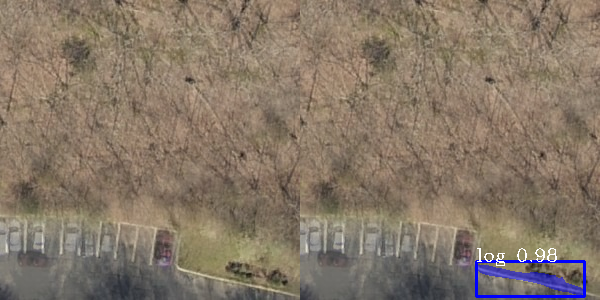

/content/test/56-40
Processed image saved successfully in your current working directory.


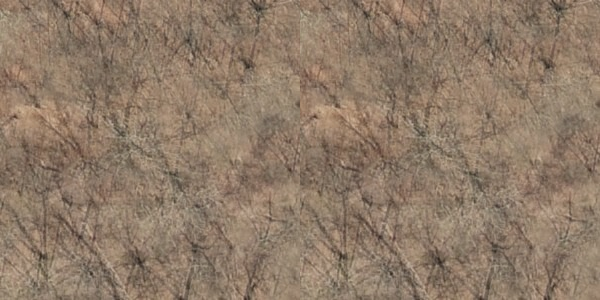

/content/test/56-41
Processed image saved successfully in your current working directory.


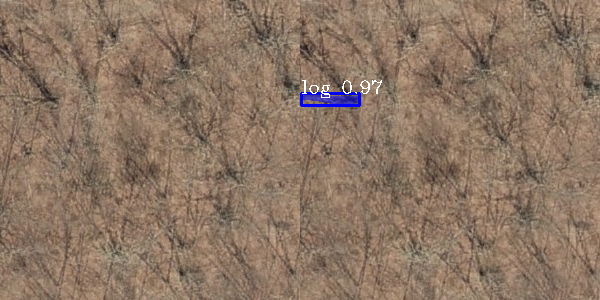

/content/test/56-42
Processed image saved successfully in your current working directory.


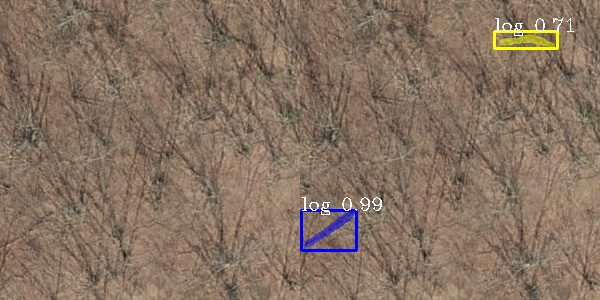

/content/test/56-43
Processed image saved successfully in your current working directory.


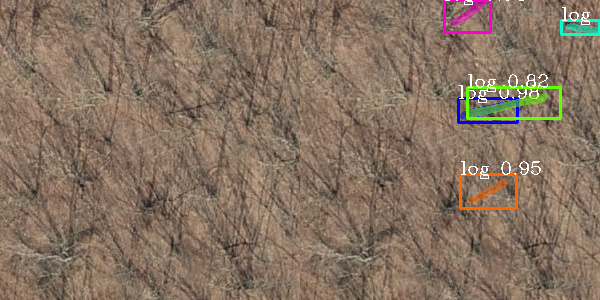

/content/test/56-44
Processed image saved successfully in your current working directory.


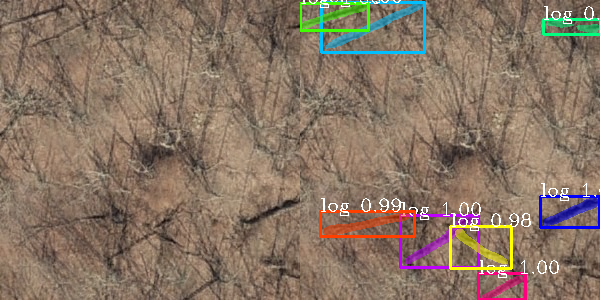

/content/test/56-45
Processed image saved successfully in your current working directory.


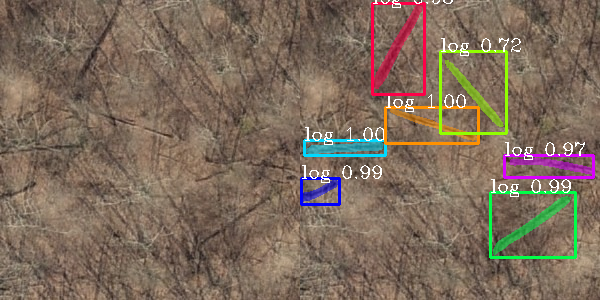

/content/test/56-46
Processed image saved successfully in your current working directory.


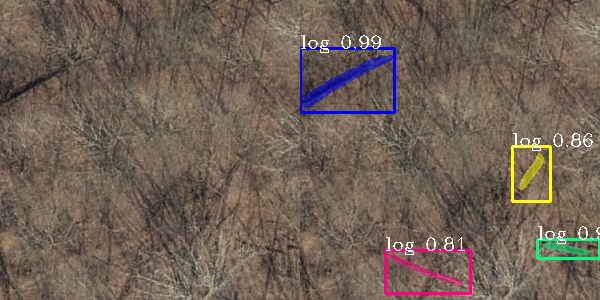

/content/test/56-47
Processed image saved successfully in your current working directory.


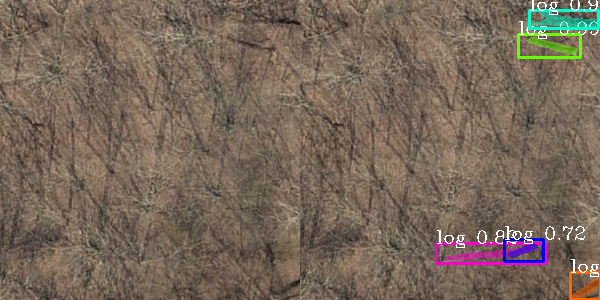

/content/test/56-48
Processed image saved successfully in your current working directory.


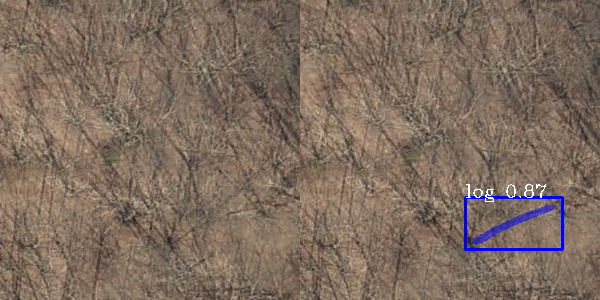

/content/test/56-49
Processed image saved successfully in your current working directory.


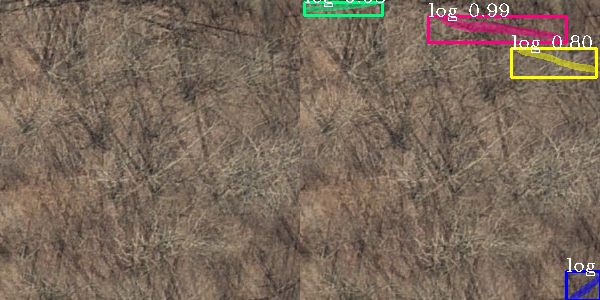

/content/test/56-50
Processed image saved successfully in your current working directory.


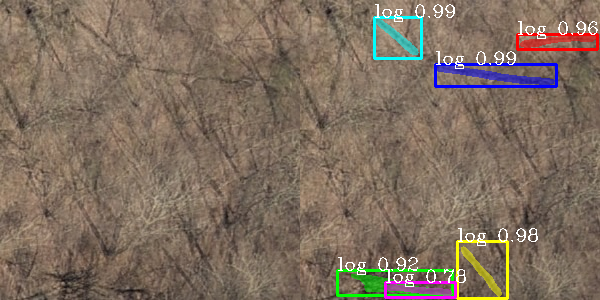

/content/test/56-51
Processed image saved successfully in your current working directory.


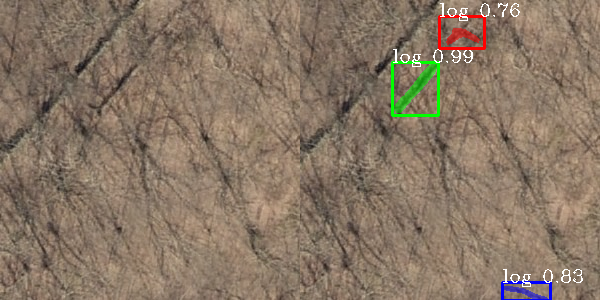

/content/test/56-52
Processed image saved successfully in your current working directory.


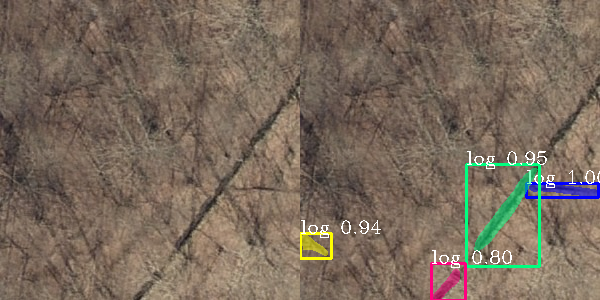

/content/test/56-53
Processed image saved successfully in your current working directory.


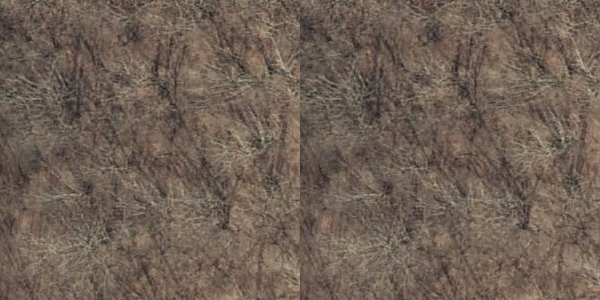

/content/test/56-54
Processed image saved successfully in your current working directory.


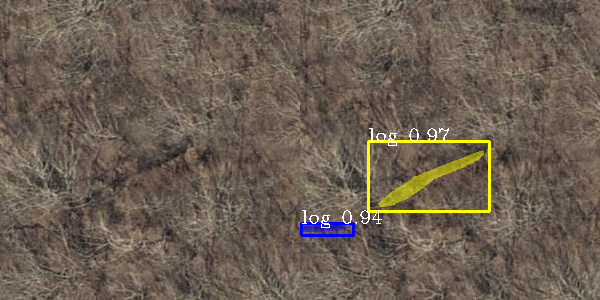

/content/test/56-55
Processed image saved successfully in your current working directory.


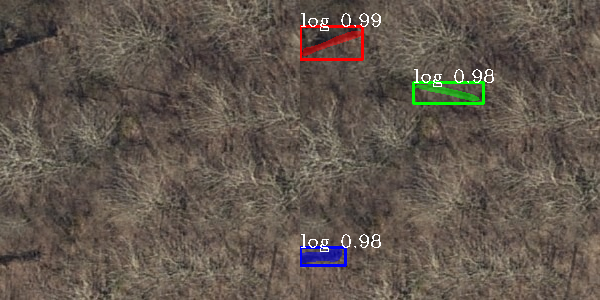

/content/test/56-56
Processed image saved successfully in your current working directory.


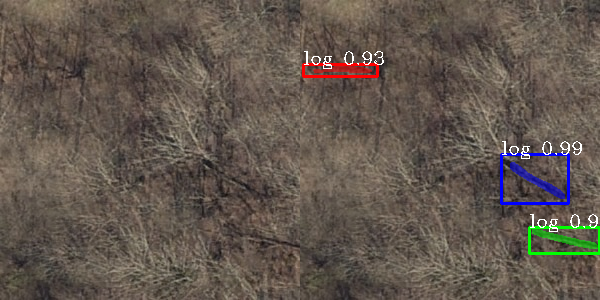

/content/test/56-57
Processed image saved successfully in your current working directory.


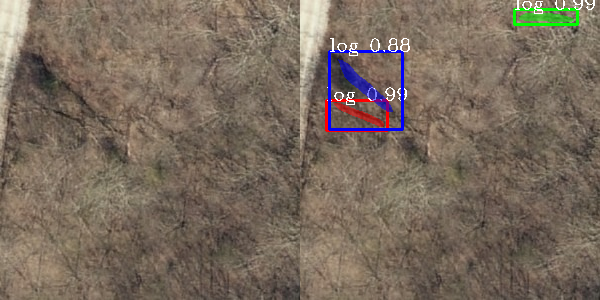

/content/test/56-58
Processed image saved successfully in your current working directory.


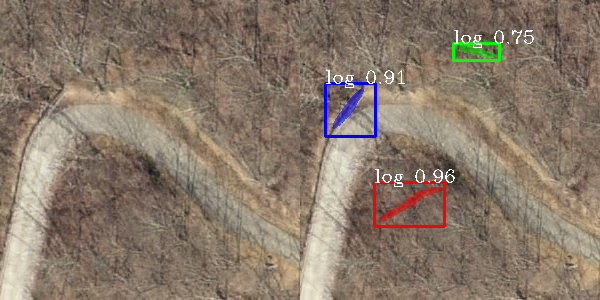

/content/test/57-39
Processed image saved successfully in your current working directory.


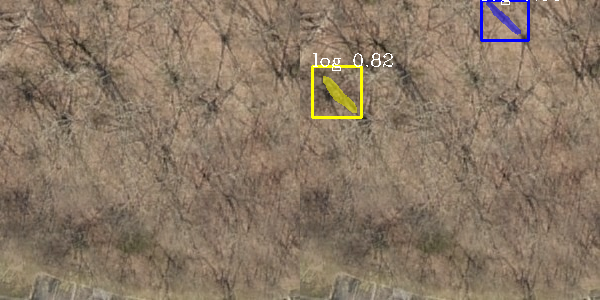

/content/test/57-40
Processed image saved successfully in your current working directory.


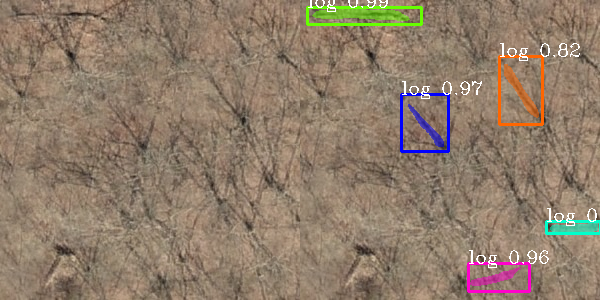

/content/test/57-41
Processed image saved successfully in your current working directory.


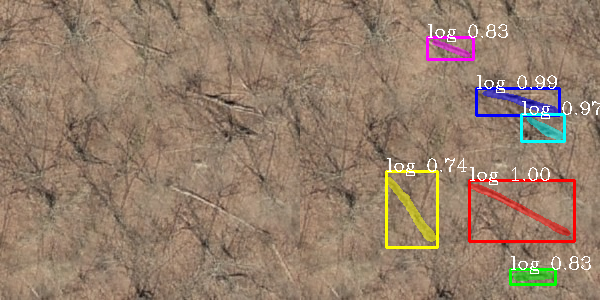

/content/test/57-42
Processed image saved successfully in your current working directory.


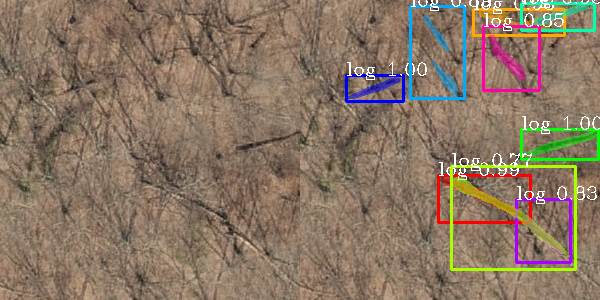

/content/test/57-43
Processed image saved successfully in your current working directory.


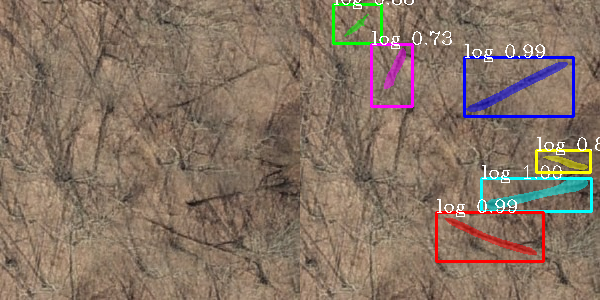

/content/test/57-44
Processed image saved successfully in your current working directory.


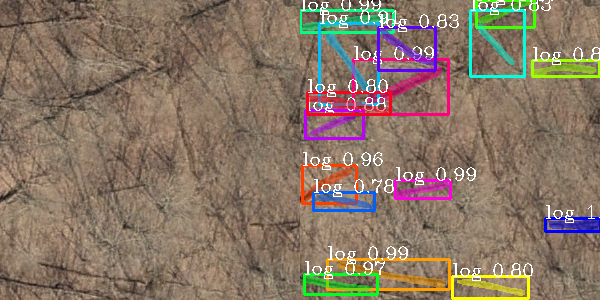

/content/test/57-45
Processed image saved successfully in your current working directory.


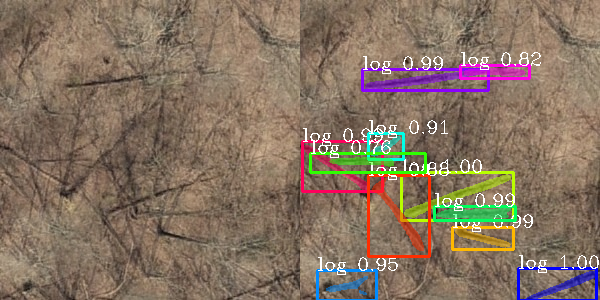

/content/test/57-46
Processed image saved successfully in your current working directory.


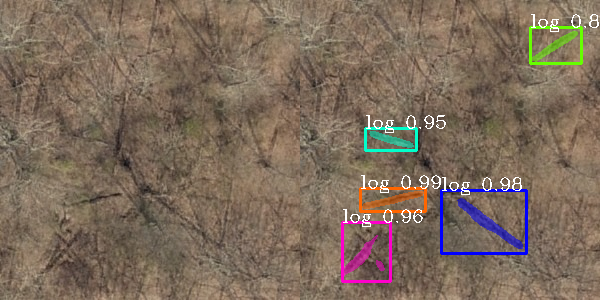

/content/test/57-47
Processed image saved successfully in your current working directory.


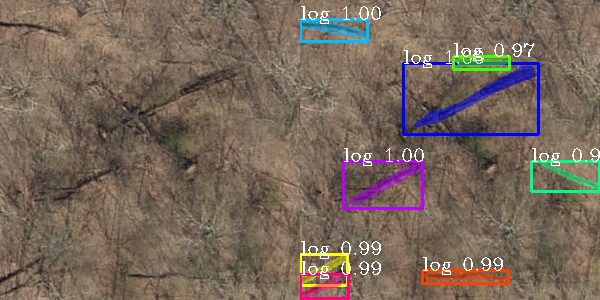

/content/test/57-48
Processed image saved successfully in your current working directory.


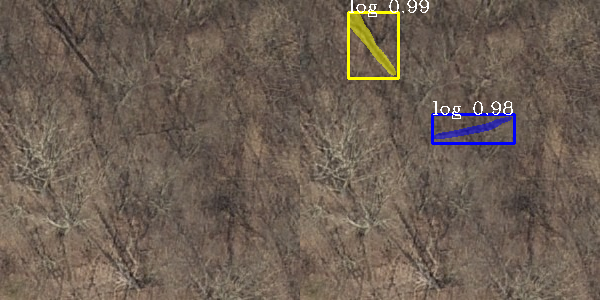

/content/test/57-49
Processed image saved successfully in your current working directory.


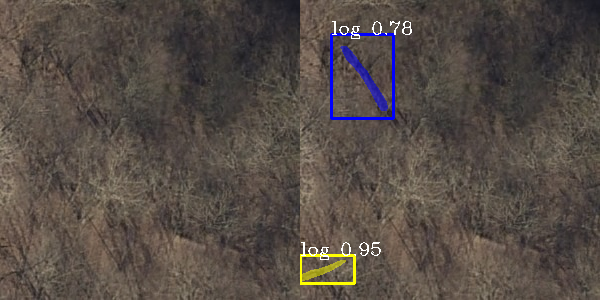

/content/test/57-50
Processed image saved successfully in your current working directory.


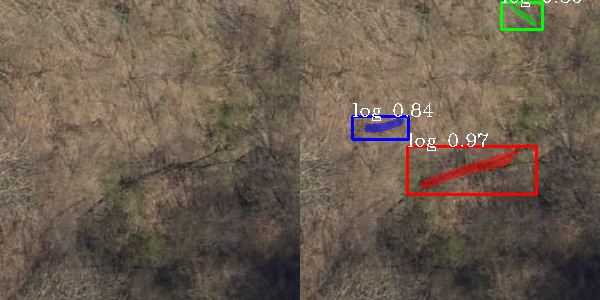

/content/test/57-51
Processed image saved successfully in your current working directory.


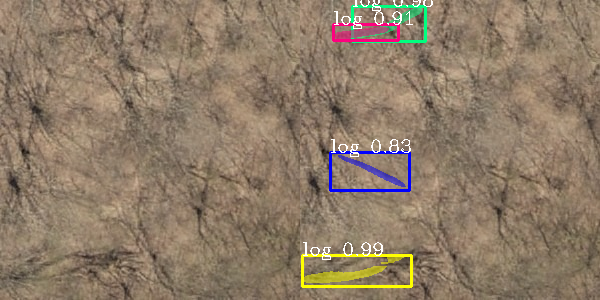

/content/test/57-52
Processed image saved successfully in your current working directory.


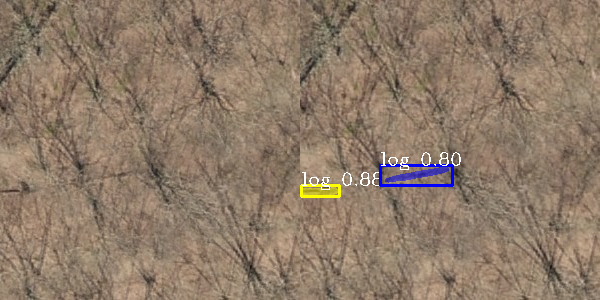

/content/test/57-53
Processed image saved successfully in your current working directory.


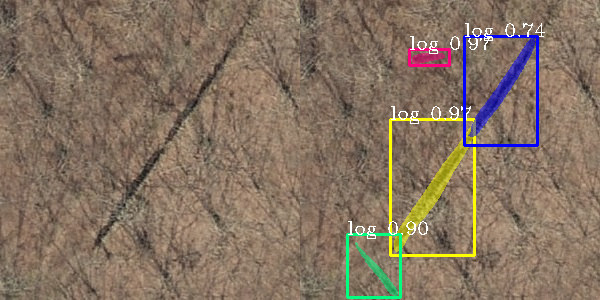

/content/test/57-54
Processed image saved successfully in your current working directory.


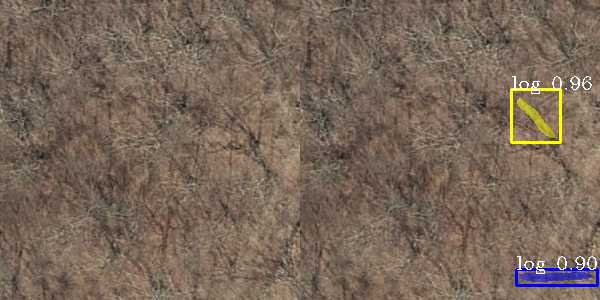

/content/test/57-55
Processed image saved successfully in your current working directory.


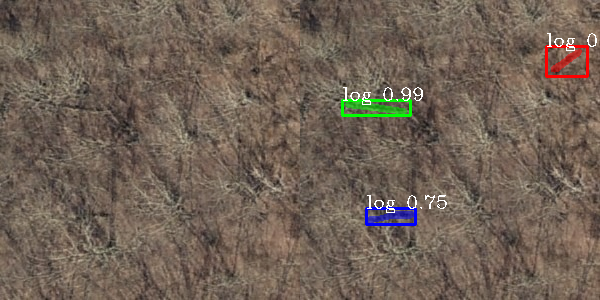

/content/test/57-56
Processed image saved successfully in your current working directory.


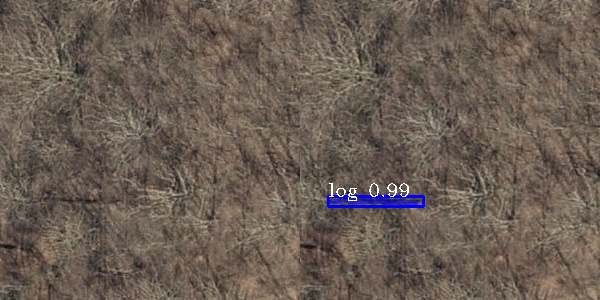

/content/test/57-57
Processed image saved successfully in your current working directory.


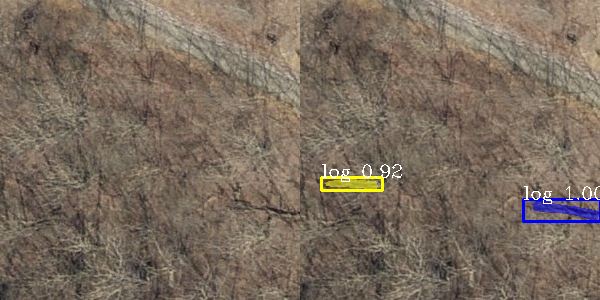

/content/test/57-58
Processed image saved successfully in your current working directory.


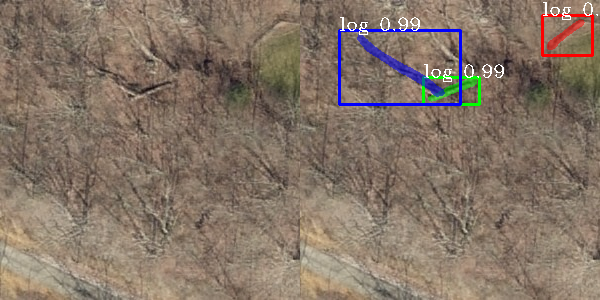

In [ ]:
   import pixellib
   from pixellib.instance import custom_segmentation
   from google.colab.patches import cv2_imshow
   import cv2

   segment_image = custom_segmentation()
   segment_image.inferConfig(num_classes= 1, class_names= ["BG", "log"])

   # select the best model from /content/mask_rcnn_models/
   model_path = '/content/mask_rcnn_models/mask_rcnn_model.018-0.987273.h5'
   segment_image.load_model(model_path)
   
   # goes through 40 images from 56/39 to 57/58
   for i in range(56,58):
     for s in range(39,59):
       path = "/content/test/"+ str(i)+ "-" + str(s) 
       print(path)
       segmask, output = segment_image.segmentImage(path +'.jpg', show_bboxes=True, output_image_name= path + "out.jpg")
       
       cv2_imshow(cv2.hconcat(( 
         cv2.imread(path +'.jpg'),
         output))
        )